In [13]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date1='ut20160811'
obs_date2='ut20160922'
obj_name='Wasp52'

midtime1=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
midtime2=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path1='/Volumes/ermay_ext/Magellan/'+obs_date1+'/'
path2='/Volumes/ermay_ext/Magellan/'+obs_date2+'/'

#data_path=path+obj_name+'_Spec/'      #path to where your data is saved
#flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
#DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
#FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
#WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH1=path1+'SaveData_'+obj_name+'/'
SAVEPATH2=path2+'SaveData_'+obj_name+'/'

#wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


In [14]:
import pickle

W52=pickle.load(open(SAVEPATH1+'PLOTS/models/wasp52b.pickle'))
W52_spec=W52['spectra']
Tetal_rads=(((W52_spec['data_1'])['high'])['depth'])**(1./2.)
Tetal_errs=(((W52_spec['data_1'])['high'])['error'])
Tetal_errs=(0.5*Tetal_rads**(-1./2.))*Tetal_errs

Tetal_wavs=((W52_spec['data_1'])['high'])['wavelength']*10000.
Tetal_widt=((W52_spec['data_1'])['high'])['width']

Letal_wavs=np.linspace(4125,8625,19)
Letal_rads=np.array([0.1643,0.1632,0.1656,0.1641,0.1629,0.1619,0.1641,0.1639,0.1638,0.1640,0.1630,0.1645,0.1646,0.1652,0.1651,0.1660,0.1658,0.1664,0.1675])
Letal_errs=np.array([14,13,12,10,9,8,11,10,7,9,6,7,8,8,8,6,7,16,16])/10000.

Cetal_wavs=np.array([5306,5471,5636,5800,5891,5981,6147,6312,6477,6642,6807,6972,7137,7302,7467,7665,7682,7699,7790,7955,8120,8285,8450,8615,8780,8945])
Cetal_widt=np.array([165,165,165,165,16,165,165,165,165,165,165,165,165,165,165,16,18,16,165,165,165,165,165,165,165,165])
Cetal_rads=np.array([0.1624,0.1624,0.1608,0.1588,0.1717,0.1596,0.1610,0.1611,0.1604,0.1616,0.1617,0.1635,0.1613,0.1614,0.1608,0.1651,0.1608,0.1626,0.1623,0.1595,0.1609,0.1598,0.1609,0.1599,0.1612,0.1606])
Cetal_errs=np.array([15,16,19,11,30,16,9,8,8,7,11,12,11,11,9,20,21,21,11,11,12,10,12,16,16,16])/10000.

Cetal_rads+=0.004

(4000, 8000)

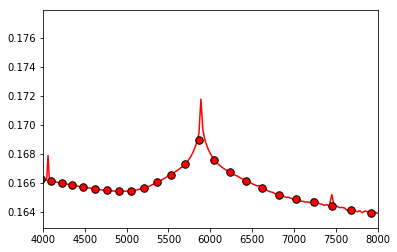

In [16]:
start=4400
end=8000
width=100

R=4
P=30

#from Binning_Model import BinFun


exo_w=np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[0],skip_header=1)*10**10.
exo_d=(np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[1],skip_header=1)/100.)**(1./2.)

exo_w_R=np.empty([len(exo_w)/R])
exo_d_R=np.empty([len(exo_d)/R])

exo_w_P=np.empty([len(exo_w)/P])
exo_d_P=np.empty([len(exo_d)/P])

z=0
for w in range(0,len(exo_w_R)):
    exo_w_R[w]=np.nanmedian(exo_w[z:z+R])
    exo_d_R[w]=np.nanmedian(exo_d[z:z+R])
    z+=R
    
z=0
for w in range(0,len(exo_w_P)):
    exo_w_P[w]=np.nanmedian(exo_w[z:z+P])
    exo_d_P[w]=np.nanmedian(exo_d[z:z+P])
    z+=P

#exo_w_P,exo_d_P=BinFun(exo_d_R,exo_w_R,start,end,width)

plt.clf()
plt.cla()
plt.plot(exo_w_R,exo_d_R,color='red')
plt.plot(exo_w_P,exo_d_P,'.',markerfacecolor='red',markeredgecolor='black',markersize=15)
plt.xlim(4000,8000)

In [30]:
def ComNights(x,dx,y,dy):
    d=np.zeros_like(x)
    dd=np.zeros_like(x)
    for i in range(0,len(d)):
        d[i]=np.nansum([x[i]/dx[i]**2.,y[i]/dy[i]**2.])/np.nansum([1./dx[i]**2.,1./dy[i]**2.])
        dd[i]=1./np.nansum([1./dx[i]**2.,1./dy[i]**2.])
    return d,dd

18
[ 0.15029015  0.16179614  0.1610958   0.16629505  0.16495775  0.16501015
  0.16131207  0.16883016  0.16652451  0.16578625  0.16753092  0.16372044
  0.16571927  0.16415128  0.16413713  0.16820578  0.16325737  0.16456963]
[        nan  0.14910651  0.14906427  0.16755227  0.16710838  0.16670075
  0.16691059  0.16653018  0.1660427   0.16657157  0.16501014  0.16479647
  0.16524709  0.1656358   0.16586476  0.16666105  0.16049522         nan]
[        nan  0.00039625  0.00063063  0.00032035  0.00048306  0.00026999
  0.00019216  0.0002232   0.00038434  0.00033068  0.00028099  0.0003708
  0.00019019  0.00028167  0.00025721  0.00027527  0.0002712   0.00036308]
[             nan              nan              nan   5.54398412e-05
   4.60351460e-05   7.38690134e-05   6.30518225e-05   7.64405343e-06
   4.64522657e-05   2.25102027e-05   8.40350986e-05   8.19374713e-05
   6.95661871e-05   1.01360367e-04   7.64549458e-05   1.10186372e-04
   1.06432435e-04              nan]
*****
[        nan  0.1617

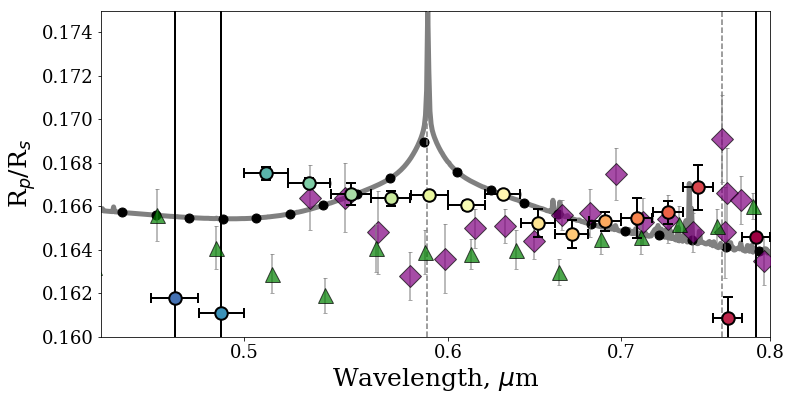

In [44]:
width=200
em=10**5.



#mfile='HATS8b_1em1S.dat'
#model=(np.genfromtxt(SAVEPATH+mfile,usecols=[1],skip_header=2)/100)**(1./2.)
#mwave=np.genfromtxt(SAVEPATH+mfile,usecols=[0],skip_header=2)*10**10.


from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import os

### night 1

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200_1=np.empty([len(bin_ctr_200_1)])
rp_e_200_1=np.empty([len(bin_ctr_200_1)])
rs_e_200_1=np.empty([len(bin_ctr_200_1)])

bin_ctr_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp_1=np.empty([len(bin_ctr_1)])
rp_e_1=np.empty([len(bin_ctr_1)])
rs_e_1=np.empty([len(bin_ctr_1)])

### night 2

bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200_2=np.empty([len(bin_ctr_200_2)])
rp_e_200_2=np.empty([len(bin_ctr_200_2)])
rs_e_200_2=np.empty([len(bin_ctr_200_2)])

bin_ctr_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp_2=np.empty([len(bin_ctr_2)])
rp_e_2=np.empty([len(bin_ctr_2)])
rs_e_2=np.empty([len(bin_ctr_2)])



### color scaling ###
bin_ctr_200=bin_ctr_200_1
bin_ctr=bin_ctr_1

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

print len(bin_ctr)

b=0
for file in os.listdir(SAVEPATH1+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_1):
            rbwhite_1=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_1[b]=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['paramserr'])[2])
            rs_e_1[b]=np.abs(np.nanmedian(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            
            b+=1
            
b=0
for file in os.listdir(SAVEPATH1+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_1):
            rbwhite_200_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
            rp_e_200_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+file)['paramserr'])[2])
            rs_e_200_1[b]=np.abs(np.nanmedian(np.load(SAVEPATH1+'Fits_200/'+file)['residuals']))*10**-6

            b+=1
            
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_2):
            rbwhite_2=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_2[b]=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['paramserr'])[2])
            rs_e_2[b]=np.abs(np.nanmedian(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            
            b+=1
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_2):
            rbwhite_200_2=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_2[b]=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
            rp_e_200_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+file)['paramserr'])[2])
            rs_e_200_2[b]=np.abs(np.nanmedian(np.load(SAVEPATH2+'Fits_200/'+file)['residuals']))*10**-6

            b+=1
            
            
            
owave=np.logspace(4000,9000,1000)



nanarr=np.array([np.nan])

rp_200_2=np.append(np.append(nanarr,rp_200_2),nanarr)
rs_e_200_2=np.append(np.append(nanarr,rs_e_200_2),nanarr)
rp_e_200_2=np.append(np.append(nanarr,rp_e_200_2),nanarr)
dt_e_t_200_2=np.append(np.append(nanarr,dt_e_t_200_2),nanarr)



n1_te_200=np.sqrt(rp_e_200_1**2.+rs_e_200_1**2.+dt_e_t_200_1**2.)
n2_te_200=np.sqrt(rp_e_200_2**2.+rs_e_200_2**2.+dt_e_t_200_2**2.)


print rp_200_1
print rp_200_2

print n1_te_200
print n2_te_200

print '*****'


rp_200,te_200=ComNights(rp_200_1,n1_te_200,rp_200_2,n2_te_200)
print rp_200
print te_200

print '*****'


rp_2=np.append(np.append(nanarr,rp_2),nanarr)
rs_e_2=np.append(np.append(nanarr,rs_e_2),nanarr)
rp_e_2=np.append(np.append(nanarr,rp_e_2),nanarr)
dt_e_t_2=np.append(np.append(nanarr,dt_e_t_2),nanarr)

n1_te=np.sqrt(rp_e_1**2.+rs_e_1**2.+dt_e_t_1**2.)
n2_te=np.sqrt(rp_e_2**2.+rs_e_2**2.+dt_e_t_2**2.)

rp,te=ComNights(rp_1,n1_te,rp_2,n2_te)

print rp
print te


#print rp_e



wavelog=np.log(bin_ctr)
rays=np.polyfit(wavelog,rp,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))

lins=np.polyfit(wavelog,rp,0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp)**2.)
chi_flat=np.nansum((lin-rp)**2.)
chi_act=np.nansum((raya-rp)**2.)

#xerr1=np.zeros_like(bin_ctr)
#xerr2=np.zeros_like(bin_ctr)
xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
#plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d,color='gray',linewidth=5.0)
plt.plot(np.log(exo_w_P),exo_d_P,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')

plt.plot(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads,'s',markersize=15,markeredgecolor='black',markerfacecolor='orange',zorder=8,alpha=0.7)
plt.errorbar(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads, yerr=Tetal_errs,zerr=Tetal_widt/2.,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(Letal_wavs),Letal_rads,'^',markersize=15,markeredgecolor='black',markerfacecolor='green',zorder=10,alpha=0.7)
plt.errorbar(np.log(Letal_wavs),Letal_rads, yerr=Letal_errs,zerr=125.*10**(-4.),capsize=2,ecolor='grey',fmt='None',zorder=9,alpha=0.7)

plt.plot(np.log(Cetal_wavs),Cetal_rads,'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(Cetal_wavs),Cetal_rads, yerr=Cetal_errs,zerr=Cetal_widt,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

for b in range(0,len(bin_ctr)):
    if b==0 or b==1 or b==2 or b==5:
        continue
    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
    #    continue
    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(te[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

for b in range(0,len(bin_ctr_200)):
    if b==0:# or b==1 or b==3 or b==11 or b==17:
        continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(te_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))
plt.ylim(0.16,0.175)

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH1+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.pdf')    
plt.savefig(SAVEPATH2+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.pdf')  